In [73]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import dataset

In [74]:
! pip install kaggle

In [75]:
! mkdir -p ~/.kaggle

In [76]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [77]:
! cp kaggle.json ~/.kaggle

In [78]:
! chmod 600 /root/.kaggle/kaggle.json

In [79]:
! kaggle datasets list

ref                                                  title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                      DAIGT V2 Train Dataset                      29MB  2023-11-16 01:38:36           3050        252  1.0              
muhammadbinimran/housing-price-prediction-data       Housing Price Prediction Data              763KB  2023-11-21 17:56:32          12858        220  1.0              
thedrcat/daigt-proper-train-dataset                  DAIGT Proper Train Dataset                 119MB  2023-11-05 14:03:25           2367        185  1.0              
thedrcat/daigt-external-train-dataset                DAIGT External Train Dataset               435MB  2023-11-06 17:10:37            470         55  1.0       

In [80]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

 79% 52.0M/66.0M [00:00<00:00, 179MB/s]
100% 66.0M/66.0M [00:00<00:00, 181MB/s]


In [81]:
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [82]:
df = pd.read_csv('creditcard.csv')

In [83]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Data preprocessing

In [84]:
df.shape

(284807, 31)

In [85]:
#checking the null values
df.isnull().values.sum()

0

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [87]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [88]:
fraud = df[df['Class'] == 1]

In [89]:
non_fraud = df[df['Class'] == 0]

In [90]:
print(fraud.shape)
print(non_fraud.shape)

(492, 31)
(284315, 31)


In [91]:
#random selection of samples
non_fraud_t = non_fraud.sample(n = 492)

In [92]:
non_fraud_t.shape

(492, 31)

In [93]:
df1 = fraud.append(non_fraud_t, ignore_index=True)

<ipython-input-93-b5eb9aa7b0ca>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = fraud.append(non_fraud_t, ignore_index=True)


In [94]:
df1.shape

(984, 31)

In [95]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [96]:
df1['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [97]:
x = df1.drop(['Class'], axis = 1)

In [98]:
y = df1['Class']

#Splitting the dataset into train and test dataset

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [100]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(787, 30)
(197, 30)
(787,)
(197,)


In [101]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [102]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

In [103]:
x_train


array([[ 0.88971033, -0.22456307, -0.43465521, ..., -2.57561399,
        -1.86512901, -0.0607404 ],
       [-0.82632878,  0.518497  , -0.08248758, ...,  0.47516874,
         0.61707009, -0.43884424],
       [-0.86271762,  0.19829311,  0.11104355, ...,  0.31466822,
         0.46982934, -0.43782726],
       ...,
       [ 1.07032119,  0.39173765, -0.50066689, ...,  0.09517105,
        -0.09561325, -0.39545319],
       [-0.17096057,  0.24542196, -0.03387086, ..., -0.15974795,
         0.05592099,  0.11240005],
       [ 1.55695517,  0.05146163, -0.08269125, ...,  0.63864218,
         1.07746266, -0.14548855]])

In [104]:
x_test

array([[-4.07180297e-01,  6.80991658e-01, -6.42217573e-01, ...,
        -3.55034063e-02,  1.33968341e-02, -3.59053864e-01],
       [-1.79370613e-01,  3.80557129e-02, -7.38760682e-01, ...,
         1.90895547e-02, -4.59896387e-01, -3.57528397e-01],
       [-1.58101759e+00,  1.83299142e-01,  6.75577626e-01, ...,
         2.07507424e+00,  1.57441072e+00, -4.37827262e-01],
       ...,
       [-1.51904991e+00, -4.31306040e-01,  1.93811793e+00, ...,
         1.66185071e+00,  1.59758213e+00, -4.37827262e-01],
       [-6.58722720e-01,  1.77316765e-01, -8.35026443e-02, ...,
        -4.96221989e-01,  2.52566533e-04, -4.38844239e-01],
       [-1.75672601e+00,  3.44676345e-01, -2.45280093e-01, ...,
         1.79494572e-01,  1.86920474e-01, -4.23038711e-01]])

In [105]:
y_train = y_train.to_numpy()

In [106]:
y_test = y_test.to_numpy()

In [107]:
x_train.shape

(787, 30)

In [108]:
x_test.shape

(197, 30)

In [109]:
#reshape the dataset
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [110]:
print(x_train.shape, x_test.shape)

(787, 30, 1) (197, 30, 1)


#Building the model

In [111]:
model = tf.keras.models.Sequential()

In [112]:
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (30,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.3))

In [113]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))

In [114]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 30, 32)            96        
                                                                 
 batch_normalization_2 (Bat  (None, 30, 32)            128       
 chNormalization)                                                
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 15, 32)            0         
 g1D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 15, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 15, 64)            4160      
                                                                 
 batch_normalization_3 (Bat  (None, 15, 64)           

In [115]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [116]:
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [117]:
history = model.fit(x_train, y_train, epochs = 25, validation_data = (x_test, y_test))

Epoch 1/25
25/25 [==============================] - 5s 33ms/step - loss: 1.0967 - accuracy: 0.5248 - val_loss: 0.6923 - val_accuracy: 0.5279
Epoch 2/25
25/25 [==============================] - 0s 12ms/step - loss: 0.6406 - accuracy: 0.6887 - val_loss: 0.6586 - val_accuracy: 0.7056
Epoch 3/25
25/25 [==============================] - 0s 15ms/step - loss: 0.5637 - accuracy: 0.7319 - val_loss: 0.6288 - val_accuracy: 0.8173
Epoch 4/25
25/25 [==============================] - 0s 15ms/step - loss: 0.4856 - accuracy: 0.7827 - val_loss: 0.5980 - val_accuracy: 0.8223
Epoch 5/25
25/25 [==============================] - 0s 13ms/step - loss: 0.4390 - accuracy: 0.8183 - val_loss: 0.5658 - val_accuracy: 0.8376
Epoch 6/25
25/25 [==============================] - 0s 15ms/step - loss: 0.3530 - accuracy: 0.8653 - val_loss: 0.5334 - val_accuracy: 0.8274
Epoch 7/25
25/25 [==============================] - 0s 15ms/step - loss: 0.3816 - accuracy: 0.8399 - val_loss: 0.4994 - val_accuracy: 0.8376
Epoch 8/25
25

#Model prediction

In [118]:
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 6ms/step


In [119]:
pred = []
for i in range(len(y_pred)):
  pred.append(y_pred[i][0])

In [120]:
pred

[0.079826765,
 0.05289725,
 0.99934894,
 0.0853669,
 0.08606148,
 0.9998833,
 0.8048702,
 0.039845735,
 0.031418223,
 0.021459064,
 0.28707838,
 0.03210208,
 0.9999666,
 0.99680483,
 0.021094056,
 0.7620312,
 0.12763867,
 0.04838031,
 0.99999535,
 0.9999665,
 0.23854522,
 0.03320231,
 0.9998801,
 0.13610455,
 0.9715214,
 0.023592923,
 0.99583936,
 0.90509444,
 0.05528598,
 0.15697168,
 0.5642115,
 0.27797192,
 0.017162966,
 0.020883821,
 0.9999969,
 0.9980205,
 0.9995177,
 0.20330076,
 0.86558104,
 0.99999535,
 0.99937963,
 0.028193476,
 0.063707955,
 0.9998987,
 0.044634435,
 0.022311501,
 0.93016833,
 0.95566875,
 0.98534644,
 0.09680602,
 0.048915047,
 0.6809426,
 0.0068333754,
 0.043479882,
 1.0,
 0.9926386,
 0.07927905,
 0.086868666,
 0.7648413,
 0.9813402,
 0.95671576,
 0.059536345,
 0.9844214,
 0.040136635,
 0.042423856,
 0.037942603,
 0.96260303,
 0.1552595,
 0.03618432,
 0.032571793,
 0.06558031,
 0.028042248,
 0.0403153,
 0.024262447,
 0.031890478,
 0.99025834,
 0.03156921,
 

In [121]:
pred_final = []
for i in range(len(pred)):
  if(pred[i] >= 0.5):
    pred_final.append(1)
  else:
    pred_final.append(0)

In [122]:
pred_final

[0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0]

In [123]:
count = 0
for i in range(len(pred_final)):
  if(pred_final[i] == y_test[i]):
    count = count + 1
acc = (count / len(pred_final)) * 100

In [124]:
print("Accuracy on test data is : ", acc)

Accuracy on test data is :  95.43147208121827


In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [126]:
cm = confusion_matrix(y_test, pred_final)

In [127]:
cm

array([[106,   0],
       [  9,  82]])

In [128]:
accuracy = accuracy_score(y_test, pred_final)

In [129]:
print(accuracy * 100)

95.43147208121827


Text(0, 0.5, 'Loss')

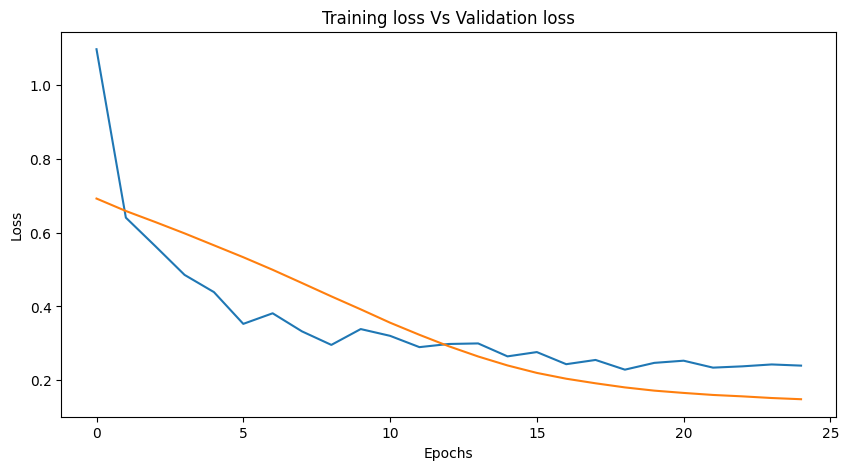

In [130]:
plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training loss Vs Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

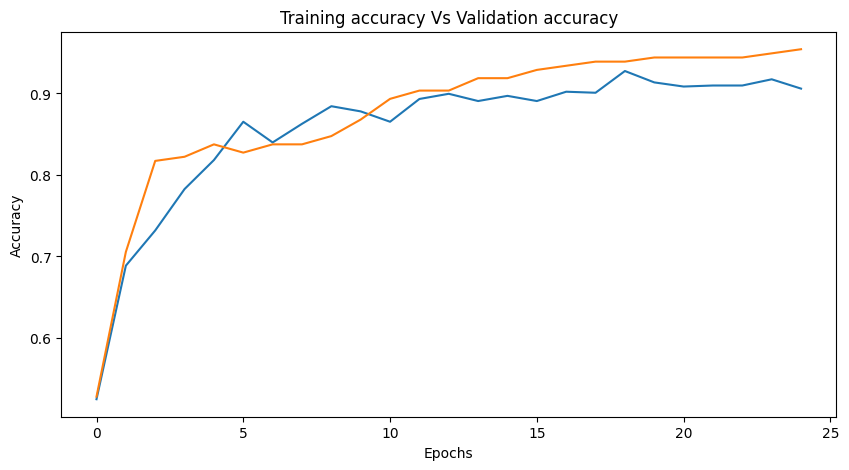

In [131]:
plt.figure(figsize = (10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training accuracy Vs Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')